# Comparisons, Masks and Boolean Logic

Sometimes we want to extract, modify, count or manipulate values in an array based on some criterion.

Boolean Masks enable us to do this.

## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city.

In [4]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('"C:/Users/kris/Downloads/Seattle2014.csv"')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

OSError: [Errno 22] Invalid argument: '"C:/Users/kris/Downloads/Seattle2014.csv"'

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

Visualizing the count of rainy days using a histogram results in the following

In [11]:
import numpy as np
import pandas as pd
# use pandas to extract rainfall inches as a NumPy array
#rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
url = "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv"
rainfall = pd.read_csv(url)['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [9]:
inches

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles®

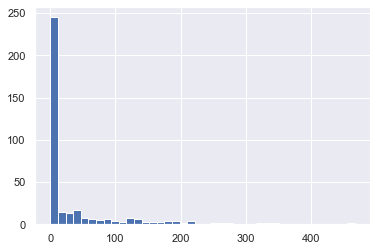

In [13]:
plt.hist(rainfall, 40);

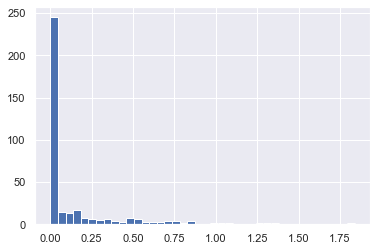

In [14]:
plt.hist(inches, 40);

Seattle has a reputation for being rainy - but in 2014 the majority of days saw little rainfall.

There are some unanswered questions here though:

- How many rainy days were there in the year?

- What is the average precipitation on those rainy days?

- How many days saw more than X amount of rainfall?

## Digging into the data

We could go through this by hand: looping over the data and incrementing a counter when a value is in a certain range.

That's a bit old school and inefficient as explained previously.

So, let's go back to ufuncs to help us do *element-wise comparison* over an array. Masking will help with this.

## Comparison Operators as ufuncs

We've seen that using `+`, `-`, `*`, `/`, and others on arrays leads to element-wise operations.

NumPy also implements comparison operators such as `<` (less than) and `>` (greater than) as element-wise ufuncs. 

The result of these comparison operators is always an array with a Boolean data type.

In [15]:
x = np.array([1, 2, 3, 4, 5])

In [16]:
x < 3  # less than

array([ True,  True, False, False, False])

In [17]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [7]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [8]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [9]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [10]:
x == 3  # equal

array([False, False,  True, False, False])

We can also do an element-wise comparison of two arrays:

In [18]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

These operators work on arrays of any size:

In [22]:
rng = np.random.RandomState(0)  # random but the same result same as using seed 
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays: Counting Entries

To count the number of `True` entries in a Boolean array, `np.count_nonzero` is useful:

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [23]:
# Another way to get this information is using np.sum.
# False is 0
# True is 1
np.sum(x < 6)

8

In [18]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

## Sanity checking data

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) `np.any` or `np.all`:

In [19]:
# are there any values greater than 8?
np.any(x > 8)

True

In [20]:
# are there any values less than zero?
np.any(x < 0)

False

In [21]:
# are all values less than 10?
np.all(x < 10)

True

In [22]:
# are all values equal to 6?
np.all(x == 6)

False

In [23]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

N.B make sure you use the NumPy vesion of these, not the plain old Python versions as they won't work as intended!

## Boolean operators

Python's bitwise logical operators `&`, `|`, `^`, and `~` can be used to combine boolean queries.

Let's look again at the rainfall data:

In [24]:
# How many days have more than half an inch of rain AND less than 1 inch
np.sum((inches > 0.5) & (inches < 1))

29

N.B parentheses are important in evaluation! Without, it would be evaluated as `inches > (0.5 & inches) < 1` which would result in an error.

In [24]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

Masks are a powerful pattern to select particular subsets of data.

e.g how many values in our array `x` are less than 5?

In [31]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

The following is the smart bit: indexing on the boolean array to select those particular values!

In [32]:
x[x < 3]

array([0, 2])

Let's see how this looks with our rainfall data:

In [29]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.